In [224]:
import numpy as np
import scipy.linalg
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from math import *

In [3]:
m= 10
alpha = 0.3
a = 1.5
b = 0.1

#coefficients for near-boundary points
a_bc,b_bc,c_bc,d_bc = (5/16,15/16,-5/16,1/16)



M = np.diag(a/2* np.ones(m)) + np.diag(a/2 * np.ones(m-1), k=1) + np.diag( b/2 * np.ones(m-1), k=-1) + np.diag(b/2* np.ones(m-2), k=2)
M[0, 0:4] = [1, 2, 3, 4]
M[-2, -4:] = [1, 2, 3, 4]
M[:-1, :]

array([[1.  , 2.  , 3.  , 4.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.75, 0.75, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.75, 0.75, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.05, 0.75, 0.75, 0.05, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.05, 0.75, 0.75, 0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.75, 0.75, 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.75, 0.75, 0.05, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.75, 0.75, 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 2.  , 3.  , 4.  ]])

In [4]:
f = np.ones((10, 5))
b = M[:-1, :]@f
b

array([[10. , 10. , 10. , 10. , 10. ],
       [ 1.6,  1.6,  1.6,  1.6,  1.6],
       [ 1.6,  1.6,  1.6,  1.6,  1.6],
       [ 1.6,  1.6,  1.6,  1.6,  1.6],
       [ 1.6,  1.6,  1.6,  1.6,  1.6],
       [ 1.6,  1.6,  1.6,  1.6,  1.6],
       [ 1.6,  1.6,  1.6,  1.6,  1.6],
       [ 1.6,  1.6,  1.6,  1.6,  1.6],
       [10. , 10. , 10. , 10. , 10. ]])

In [5]:
alphab = alpha*np.ones(m-2)
alphaa = alphab.copy()
alphaa[0] = 0
alphab[-1:] = 0
onesd = np.ones(m-1)
A = scipy.sparse.diags([alphab, onesd, alphaa], [-1, 0, 1], format = 'csr')

alphab = alpha*np.ones(m-1)
alphaa = alphab.copy()
alphaa[0:2] = 0
alphab[-2:] = 0


Ab = np.array([alphaa, onesd, alphab])
# can we do this as solve_banded... 
print(scipy.linalg.solve_banded((1,1), Ab, b))
print(scipy.sparse.linalg.spsolve(A, b))


[[10.         10.         10.         10.         10.        ]
 [-2.00365742 -2.00365742 -2.00365742 -2.00365742 -2.00365742]
 [ 2.01219141  2.01219141  2.01219141  2.01219141  2.01219141]
 [ 0.62968607  0.62968607  0.62968607  0.62968607  0.62968607]
 [ 1.22218836  1.22218836  1.22218836  1.22218836  1.22218836]
 [ 0.62968607  0.62968607  0.62968607  0.62968607  0.62968607]
 [ 2.01219141  2.01219141  2.01219141  2.01219141  2.01219141]
 [-2.00365742 -2.00365742 -2.00365742 -2.00365742 -2.00365742]
 [10.         10.         10.         10.         10.        ]]
[[10.         10.         10.         10.         10.        ]
 [-2.00365742 -2.00365742 -2.00365742 -2.00365742 -2.00365742]
 [ 2.01219141  2.01219141  2.01219141  2.01219141  2.01219141]
 [ 0.62968607  0.62968607  0.62968607  0.62968607  0.62968607]
 [ 1.22218836  1.22218836  1.22218836  1.22218836  1.22218836]
 [ 0.62968607  0.62968607  0.62968607  0.62968607  0.62968607]
 [ 2.01219141  2.01219141  2.01219141  2.01219141  2.0

In [141]:
n,m = 50,50 #arbitrary grid sizes
x = np.linspace(0,1,n)
y = np.linspace(0,1,m)
xg,yg = np.meshgrid(x,y)
dy = y[1]-y[0]
yI = y[:-1]+dy/2 #grid for interpolated data

In [7]:
def interweave(a, b):
    N = a.shape[1]
    M = a.shape[0] + b.shape[0]
    out_dtype = np.result_type(a.dtype, b.dtype)
    out = np.empty((M,N),dtype=out_dtype)
    out[::2] = a
    out[1::2] = b
    return out

In [92]:
def part2(f,method=2):
    """
    Question 2.1 i)
    Input:
        f: m x n array
        method: 1 or 2, interpolation method to use
    Output:
        fI: interpolated data (using method)
    """

    m,n = f.shape
    fI = np.zeros((m-1,n)) #use/modify as needed

    if method==1:
        fI = 0.5*(f[:-1,:]+f[1:,:])
    else:
        #Coefficients for method 2
        alpha = 0.3
        a = 1.5
        b = 0.1
        
        #coefficients for near-boundary points
        a_bc,b_bc,c_bc,d_bc = (5/16,15/16,-5/16,1/16)

        M = np.diag(a/2* np.ones(m)) + np.diag(a/2 * np.ones(m-1), k=1) + np.diag( b/2 * np.ones(m-1), k=-1) + np.diag(b/2* np.ones(m-2), k=2)
        M[0, :4] = [a_bc,b_bc,c_bc,d_bc]
        M[-2, -4:] = [a_bc,b_bc,c_bc,d_bc][::-1]
        b = M[:-1, :]@f

        
        alphab = alpha*np.ones(m-1)
        alphaa = alphab.copy()
        alphaa[0:2] = 0
        alphab[-2:] = 0
        onesd = np.ones(m-1)
        Ab = np.array([alphaa, onesd, alphab])
        fI = scipy.linalg.solve_banded((1,1), Ab, b)
        
    return fI #modify as needed

In [89]:
f_yI = np.exp(1j * 350 * np.pi * yI)
f_yg = np.exp(1j * 350 * np.pi * yg)
f_fI = part2(f_yg, method=2)

[[ 0.625-0.875j  0.625-0.875j  0.625-0.875j ...  0.625-0.875j
   0.625-0.875j  0.625-0.875j]
 [-0.7  -0.7j   -0.7  -0.7j   -0.7  -0.7j   ... -0.7  -0.7j
  -0.7  -0.7j   -0.7  -0.7j  ]
 [-0.7  +0.7j   -0.7  +0.7j   -0.7  +0.7j   ... -0.7  +0.7j
  -0.7  +0.7j   -0.7  +0.7j  ]
 ...
 [-0.7  -0.7j   -0.7  -0.7j   -0.7  -0.7j   ... -0.7  -0.7j
  -0.7  -0.7j   -0.7  -0.7j  ]
 [-0.7  +0.7j   -0.7  +0.7j   -0.7  +0.7j   ... -0.7  +0.7j
  -0.7  +0.7j   -0.7  +0.7j  ]
 [ 0.625+0.875j  0.625+0.875j  0.625+0.875j ...  0.625+0.875j
   0.625+0.875j  0.625+0.875j]]


In [137]:
norms = []
for k in range(800):
    f_yI = np.exp(1j * k * yI)
    f_yg = np.exp(1j * k * yg)
    f_fI = part2(f_yg, method=2)
    norms.append(np.linalg.norm(f_yI - f_fI[:,0]))

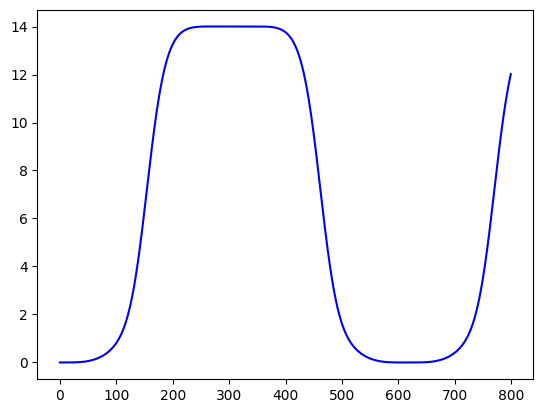

In [138]:
plt.plot(norms, color='blue')

period of 4n

In [107]:
def interweave(a, b):
    N = a.shape[1]
    M = a.shape[0] + b.shape[0]
    out_dtype = np.result_type(a.dtype, b.dtype)
    out = np.empty((M,N),dtype=out_dtype)
    out[::2] = a
    out[1::2] = b
    return out

In [371]:
def part2_analyze():
    """
    Add input/output as needed
    """



    #----- Code for generating grid, use/modify/discard as needed ----#
    n,m = 50,50 #arbitrary grid sizes - set to m=n
    x = np.linspace(0,1,n)
    y = np.linspace(0,1,m)
    xg,yg = np.meshgrid(x,y)
    dy = y[1]-y[0]
    yI = y[:-1]+dy/2 #grid for interpolated data
    #--------------------------------------------#

    #add code here
    for method in np.arange(1, 3):
        norms = []
        for k in np.arange(800):
            f_yI = np.exp(1j * k * yI) # true values under the function
            f_yg = np.exp(1j * k * yg) 
            f_fI = part2(f_yg, method=method) # interpolated values
            norms.append(np.linalg.norm(f_yI - f_fI[:,0]))

        plt.figure()
        plt.plot(norms, color='blue')
        plt.title(f'Error at wave number k, for method {method}')
        plt.xlabel('k')
        plt.ylabel('Error')
        plt.show()

    kh_max = [4, 50]
    for k_max in kh_max:
        kh_range = np.arange(0.01, k_max, 0.01)

        m1_list = []
        m2_list = []
        for x in kh_range:
            m1_list.append(x * np.cos(x /2))
            m2_list.append(x * (b * np.cos(3*x/2) + a * np.cos(x/2) - alpha * 2 * np.cos(x))) 

        index_m1 = np.where(((kh_range - m1_list) / kh_range) >= 0.01)[0][0]
        kh_m1 = kh_range[index_m1]
        lamh_m1 = ceil(2 * np.pi/kh_m1)

        index_m2 = np.where((kh_range - m2_list / kh_range) >= 0.1)[0][0]
        kh_m2 = kh_range[index_m2]
        lamh_m2 = ceil(2*np.pi/kh_m2) 

        plt.plot(kh_range, kh_range, label='kh', color='purple')
        plt.plot(kh_range, m1_list, label='method 1', color='red')
        plt.plot(kh_range, m2_list, label='method 2', color='blue')
        plt.plot(kh_range[index_m1], m2_list[index_m1], '.', color='yellow', label='Error for method 1 ≈ 1%')
        plt.plot(kh_range[index_m2], m2_list[index_m2], '.', color='lime', label='Error for method 2 ≈ 1%')
        plt.xlabel('kh')
        plt.ylabel('modified kh')
        plt.title('Modified wavenumber over range of kh values')
        plt.legend()
        plt.show()

    print(f'The number of points per wavelength for 1% error in method 1 is {lamh_m1}, and in method 2 is {lamh_m2}')

    n,m = 23,23
    x = np.linspace(0,1,n)
    y = np.linspace(0,1,m)
    xg,yg = np.meshgrid(x,y)
    dy = y[1]-y[0]
    yI = y[:-1]+dy/2
    k=20
    denoms = [60, 220]
    for denom in denoms:
        h = np.pi/denom
        n,m = h,h
        x = np.arange(0,1,n)
        y = np.arange(0,1,m)
        xg,yg = np.meshgrid(x,y)
        dy = y[1]-y[0]
        yI = y[:-1]+dy/2
        norms1 = [] 
        norms2 = []
        for i in np.arange(y.shape[0]-1):
            f_yI = np.exp(1j * k * yI) # true values under the function
            f_yg = np.exp(1j * k * yg) 
            f_fI_1 = part2(f_yg, method=1) # interpolated values
            norms1.append(f_yI[i] - f_fI_1[0,i])
            f_fI_2 = part2(f_yg, method=2) # interpolated values
            norms2.append(f_yI[i] - f_fI_2[0,i])

        plt.plot(y[:-1], np.abs(norms2), color='red', label='method 2')
        plt.plot(y[:-1], np.abs(norms1), color='blue', label='method 1')
        plt.title(f'Errors for {int(denom/10)} gridpoints per wavelength')
        plt.legend()
        plt.xlabel('$y$')
        plt.ylabel('$y_{true} - y_{interpolated}$')

        plt.show()


    return None #modify as needed

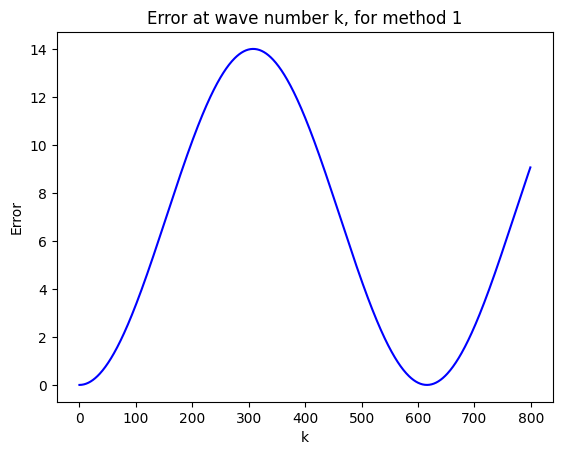

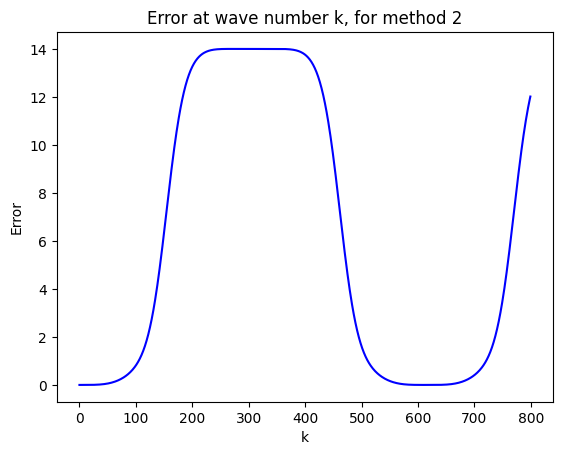

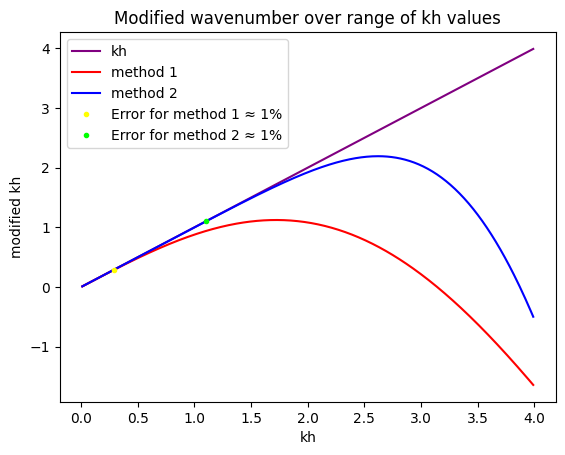

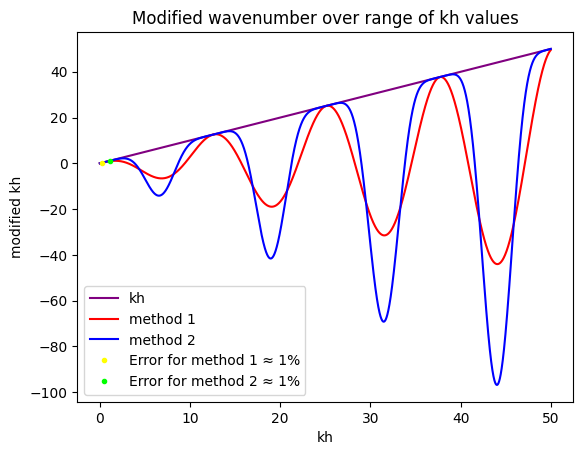

The number of points per wavelength for 1% error in method 1 is 22, and in method 2 is 6


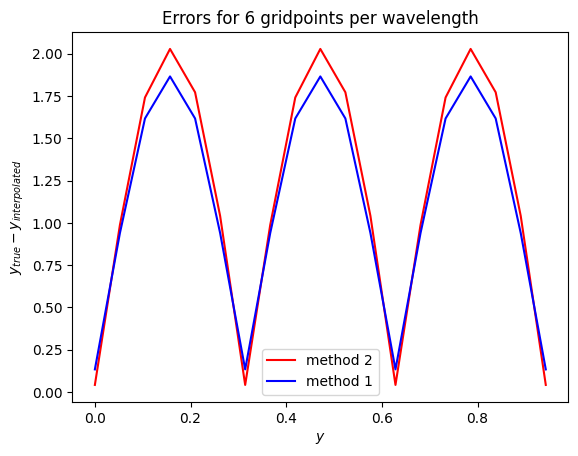

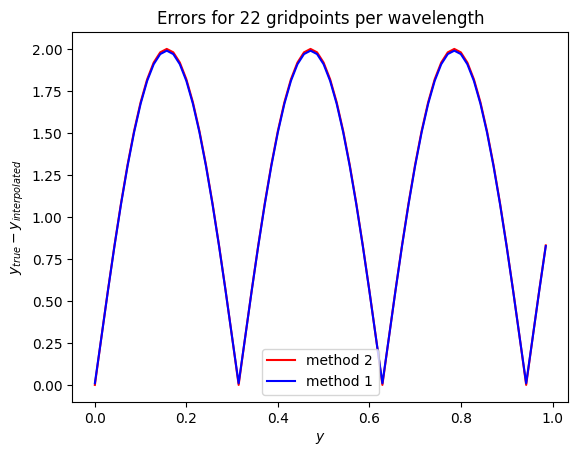

In [372]:
part2_analyze()

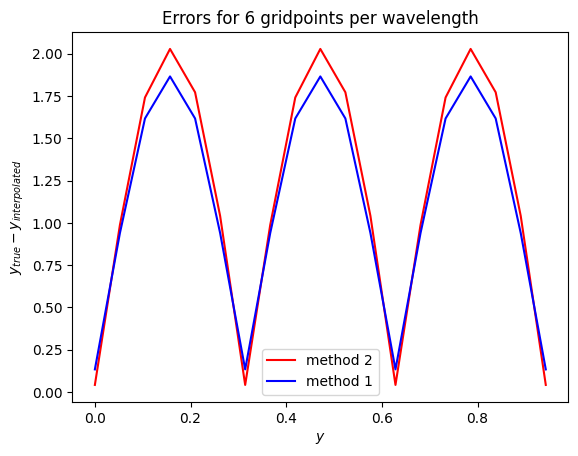

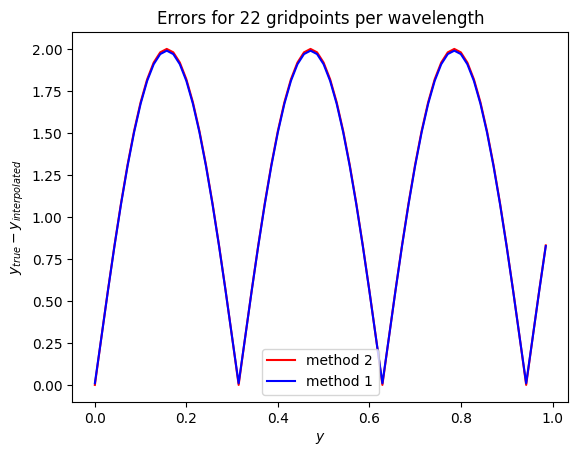

In [366]:
n,m = 23,23
x = np.linspace(0,1,n)
y = np.linspace(0,1,m)
xg,yg = np.meshgrid(x,y)
dy = y[1]-y[0]
yI = y[:-1]+dy/2
k=20
denoms = [60, 220]
for denom in denoms:
    h = np.pi/denom
    n,m = h,h
    x = np.arange(0,1,n)
    y = np.arange(0,1,m)
    xg,yg = np.meshgrid(x,y)
    dy = y[1]-y[0]
    yI = y[:-1]+dy/2
    norms1 = [] 
    norms2 = []
    for i in np.arange(y.shape[0]-1):
        f_yI = np.exp(1j * k * yI) # true values under the function
        f_yg = np.exp(1j * k * yg) 
        f_fI_1 = part2(f_yg, method=1) # interpolated values
        norms1.append(f_yI[i] - f_fI_1[0,i])
        f_fI_2 = part2(f_yg, method=2) # interpolated values
        norms2.append(f_yI[i] - f_fI_2[0,i])

    plt.plot(y[:-1], np.abs(norms2), color='red', label='method 2')
    plt.plot(y[:-1], np.abs(norms1), color='blue', label='method 1')
    plt.title(f'Errors for {int(denom/10)} gridpoints per wavelength')
    plt.legend()
    plt.xlabel('$y$')
    plt.ylabel('$y_{true} - y_{interpolated}$')

    plt.show()


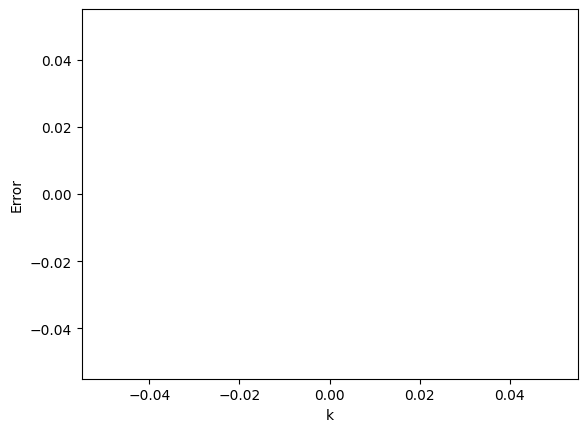

In [321]:
plt.figure()
plt.plot(np.abs(norms), color='blue')
# plt.title(f'Error at wave number k, for method {method}')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

(49,)

In [260]:
# method 2
alpha = 0.3
a = 1.5
b = 0.1

kh_range = np.arange(0.01, 50, 0.01)

m1_list = []
m2_list = []
for x in kh_range:
    m1_list.append(x * np.cos(x /2))
    m2_list.append(x * (b * np.cos(3*x/2) + a * np.cos(x/2) - alpha * 2 * np.cos(x))) # the modified wave numbers

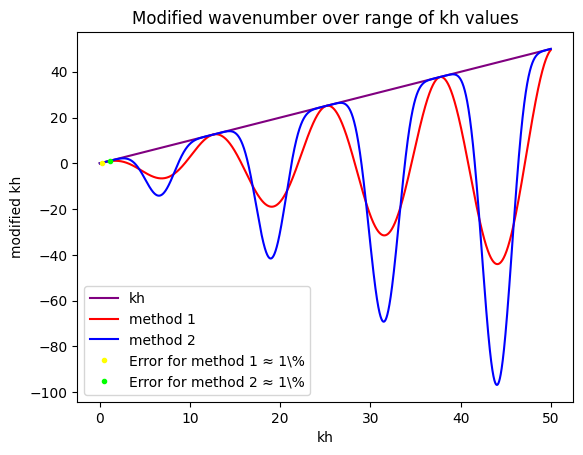

In [248]:
plt.plot(kh_range, kh_range, label='kh', color='purple')
plt.plot(kh_range, m1_list, label='method 1', color='red')
plt.plot(kh_range, m2_list, label='method 2', color='blue')
plt.plot(kh_range[index_m1], m2_list[index_m1], '.', color='yellow', label='Error for method 1 ≈ 1\%')
plt.plot(kh_range[index_m2], m2_list[index_m2], '.', color='lime', label='Error for method 2 ≈ 1\%')
plt.xlabel('kh')
plt.ylabel('modified kh')
plt.title('Modified wavenumber over range of kh values')
plt.legend()
plt.show()

In [226]:
index_m1 = np.where(((kh_range - m1_list) / kh_range) >= 0.01)[0][0]
kh_m1 = kh_range[index_m1]
lamh_m1 = ceil(2 * np.pi/kh_m1)

22

In [227]:
index_m2 = np.where((kh_range - m2_list / kh_range) >= 0.1)[0][0]
kh_m2 = kh_range[index_m2]
lamh_m2 = ceil(2*np.pi/kh_m2)
# index